# Loss Functions

This python script illustrates the different loss functions for regression and classification. We start by loading the ncessary libraries and resetting the computational graph.

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [11]:
# Various Predicted X-values
X = torch.linspace(-1, 1, 500)

# Create our target of zero
y = torch.zeros(500)

Loss function is an important part in artificial neural networks, which is used to measure the inconsistency between predicted value $((\hat{y}))$ and actual label $((y))$. It is a non-negative value, where the robustness of model increases along with the decrease of the value of loss function. Loss function is the hard core of empirical risk function as well as a significant component of structural risk function. Generally, the structural risk function of a model is consist of empirical risk term and regularization term, which can be represented as
$$\boldsymbol{\theta}^{*}=\arg\min_{\boldsymbol{\theta}}\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})+\lambda\centerdot\Phi(\boldsymbol{\theta})=\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},\hat{y}^{(i)}\big)+\lambda\centerdot\Phi(\boldsymbol{\theta})\\=\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)+\lambda\centerdot\Phi(\boldsymbol{\theta})$$
where $(\Phi(\boldsymbol{\theta}))$ is the regularization term or penalty term, $(\boldsymbol{\theta})$ is the parameters of model to be learned, $(f(\centerdot))$ represents the activation function and $(\mathbf{x}^{(i)}=\{x_{1}^{(i)},x_{2}^{(i)},\dots ,x_{m}^{(i)}\}\in\mathbb{R}^{m})$ denotes the a training sample.
Here we only concentrate on the empirical risk term (loss function)$\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})=\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)$and introduce the mathematical expressions of several commonly-used loss functions as well as the corresponding expression in DeepLearning4J.

## Mean Squared Error
Mean Squared Error (MSE), or quadratic, loss function is widely used in linear regression as the performance measure, and the method of minimizing MSE is called Ordinary Least Squares (OSL), the basic principle of OSL is that the optimized fitting line should be a line which minimizes the sum of distance of each point to the regression line, i.e., minimizes the quadratic sum. The standard form of MSE loss function is defined as
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}
$$
where $((y^{(i)}-\hat{y}^{(i)}))$ is named as residual, and the target of MSE loss function is to minimize the residual sum of squares. In DeepLearning4J, it is LossFunctions.LossFunction.MSE or LossFunctions.LossFunction.SQUARED_LOSS (they are same in DL4J). However, if using Sigmoid as the activation function, the quadratic loss function would suffer the problem of slow convergence (learning speed), for other activation funtions, it would not have such problem.
For example, by using Sigmoid, $(\hat{y}^{(i)}=\sigma(\mathbf{z}^{(i)})=\sigma(\boldsymbol{\theta}^{T}\mathbf{x}^{(i)}))$, simply, we only consider one sample, say, $((y-\sigma(\mathbf{z}))^{2})$, and it derivative is computed by
$$\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=-(y-\sigma(\mathbf{z}))\centerdot\sigma'(\mathbf{z})\centerdot\mathbf{x}$$
according to the shape and feature of Sigmoid (see my another blog: Activation Functions in Artificial Neural Networks), when $(\sigma(\mathbf{z}))$ tends to 0 or 1, $(\sigma'(\mathbf{z}))$ is close to zero, and when $(\sigma(\mathbf{z}))$ close to 0.5, $(\sigma'(\mathbf{z}))$ will reach it maximum. In this case, when the difference between predicted value and true label $((y-\sigma(\mathbf{z})))$ is large, $(\sigma'(\mathbf{z}))$ will close to 0, which decreases the convergence speed, this is improper, since we expect that the learning speed should be fast when the error is large.

In [18]:
loss = nn.MSELoss(reduction='elementwise_mean')
out = loss(X, y)
out

tensor(0.3347)

#### Mean Squared Logarithmic Error
Mean Squared Logarithmic Error (MSLE) loss function is a variant of MSE, which is defined as
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big(\log(y^{(i)}+1)-\log(\hat{y}^{(i)}+1)\big)^{2}
$$
MSLE is also used to measure the different between actual and predicted. By taking the log of the predictions and actual values, what changes is the variance that you are measuring. It is usually used when you do not want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers. Another thing is that MSLE penalizes under-estimates more than over-estimates. 1. If both predicted and actual values are small: MSE and MSLE is same. 2. If either predicted or the actual value is big: $(MSE > MSLE)$. 3. If both predicted and actual values are big: $(MSE > MSLE)$ (MSLE becomes almost negligible).

### L2
L2 loss function is the square of the L2 norm of the difference between actual value and predicted value. It is mathematically similar to MSE, only do not have division by $(n)$, it is computed by
$$
\boldsymbol{\mathcal{L}}=\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}
$$
For more details, typically in mathematic, please read the paper: On Loss Functions for Deep Neural Networks in Classification, which gives comprehensive explanation about several commomly-used loss functions, including L2, L1 loss function.

In [36]:
l2_loss = nn.MSELoss(reduction='none')
l2_out = l2_loss(X, y)

### Mean Absolute Error
Mean Absolute Error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes, which is computed by $$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big\lvert y^{(i)}-\hat{y}^{(i)}\big\rvert
$$
where $(\lvert\centerdot\rvert)$ denotes the absolute value. Albeit, both MSE and MAE are used in predictive modeling, there are several differences between them. MSE has nice mathematical properties which makes it easier to compute the gradient. However, MAE requires more complicated tools such as linear programming to compute the gradient. Because of the square, large errors have relatively greater influence on MSE than do the smaller error. Therefore, MAE is more robust to outliers since it does not make use of square. On the other hand, MSE is more useful if concerning about large errors whose consequences are much bigger than equivalent smaller ones. MSE also corresponds to maximizing the likelihood of Gaussian random variables.

In [23]:
loss = nn.L1Loss(reduction='elementwise_mean')
out = loss(X, y)
out

tensor(0.5010)

### Mean Absolute Percentage Error
Mean Absolute Percentage Error (MAPE) is a variant of MAE, it is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\bigg\lvert\frac{y^{(i)}-\hat{y}^{(i)}}{y^{(i)}}\bigg\rvert\centerdot100
$$
Although the concept of MAPE sounds very simple and convincing, it has major drawbacks in practical application: 1. It cannot be used if there are zero values (which sometimes happens for example in demand data) because there would be a division by zero. 2. For forecasts which are too low the percentage error cannot exceed $(100\%)$, but for forecasts which are too high there is no upper limit to the percentage error. 3. When MAPE is used to compare the accuracy of prediction methods it is biased in that it will systematically select a method whose forecasts are too low. This little-known but serious issue can be overcome by using an accuracy measure based on the ratio of the predicted to actual value (called the Accuracy Ratio), this approach leads to superior statistical properties and leads to predictions which can be interpreted in terms of the geometric mean.

### L1
L1 loss function is sum of absolute errors of the difference between actual value and predicted value. Similar to the relation between MSE and L2, L1 is mathematically similar to MAE, only do not have division by $(n)$, and it is defined as 
$$
\boldsymbol{\mathcal{L}}=\sum_{i=1}^{n}\big\lvert y^{(i)}-\hat{y}^{(i)}\big\rvert
$$

In [35]:
l1_loss = nn.L1Loss(reduction='none')
l1_out = l1_loss(X, y)

### Pseudo-Huber Loss
The psuedo-huber loss function is a smooth approximation to the L1 loss as the (predicted - target) values get larger. When the predicted values are close to the target, the pseudo-huber loss behaves similar to the L2 loss.

$$\text{loss}(x, y) = \frac{1}{n} \sum_{i} z_{i}\$$

where $z_{i}$ is given by:

$$
\begin{split}z_{i} =
\begin{cases}
0.5 (x_i - y_i)^2, &; \text{if } |x_i - y_i| &lt; 1 \\
|x_i - y_i| - 0.5, &; \text{otherwise }
\end{cases}
\end{split}
$$

In [33]:
p_huber = nn.SmoothL1Loss(reduction='none')
p_out = p_huber(X, y)

## Plot the Regression Losses
Here we use Matplotlib to plot the L1, L2, and Pseudo-Huber Losses.

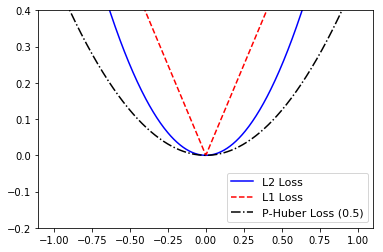

In [37]:
plt.plot(X.numpy(), l2_out.numpy(), 'b-', label='L2 Loss')
plt.plot(X.numpy(), l1_out.numpy(), 'r--', label='L1 Loss')
plt.plot(X.numpy(), p_out.numpy(), 'k-.', label='P-Huber Loss (0.5)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## Categorical Predictions

-------------------------------

We now consider categorical loss functions.  Here, the predictions will be around the target of 1.

In [53]:
# Various predicted X values
x_vals = torch.empty(500, dtype=torch.long).random_(5)

# Target of 1.0
y_val = torch.empty(500, dtype=torch.long).random_(5)

### Kullback Leibler (KL) Divergence
KL Divergence, also known as relative entropy, information divergence/gain, is a measure of how one probability distribution diverges from a second expected probability distribution. KL divergence loss function is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\mathcal{D}_{KL}(y^{(i)}||\hat{y}^{(i)})=\frac{1}{n}\sum_{i=1}^{n}\big[y^{(i)}\centerdot\log\big(\frac{y^{(i)}}{\hat{y}^{(i)}}\big)\big]\\=\underbrace{\frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}\centerdot\log(y^{(i)})\big)}_{\boldsymbol{entropy}}\underbrace{-\frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}\centerdot\log(\hat{y}^{(i)})\big)}_{\boldsymbol{cross-entropy}}
$$
where the first term is entropy and another is cross entropy (another kind of loss function which will be introduced later). KL divergence is a distribution-wise asymmetric measure and thus does not qualify as a statistical metric of spread. In the simple case, a KL divergence of 0 indicates that we can expect similar, if not the same, behavior of two different distributions, while a KL divergence of 1 indicates that the two distributions behave in such a different manner that the expectation given the first distribution approaches zero. For more details, please visit the wikipedia: [link].

### Cross Entropy
Cross Entropy is commonly-used in binary classification (labels are assumed to take values 0 or 1) as a loss function (For multi-classification, use Multi-class Cross Entropy), which is computed by
$$
\boldsymbol{\mathcal{L}}=-\frac{1}{n}\sum_{i=1}^{n}\big[y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})\big]
$$
Cross entropy measures the divergence between two probability distribution, if the cross entropy is large, which means that the difference between two distribution is large, while if the cross entropy is small, which means that two distribution is similar to each other. As we have mentioned in MSE that it suffers slow divergence when using Sigmoid as activation function, here the cross entropy does not have such problem. Samely, $(\hat{y}^{(i)}=\sigma(\mathbf{z}^{(i)})=\sigma(\boldsymbol{\theta}^{T}\mathbf{x}^{(i)}))$, and we only consider one training sample, by using Sigmoid, we have $(\boldsymbol{\mathcal{L}}=y\log(\sigma(\mathbf{z}))+(1-y)\log(1-\sigma(\mathbf{z})))$, and compute it derivative as
$$
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=(y-\sigma(\mathbf{z}))\centerdot\mathbf{x}
$$
compare to the derivative in MSE, it eliminates the term $(\sigma'(\mathbf{z}))$, where the learning speed is only controlled by $((y-\sigma(\mathbf{z})))$. In this case, when the difference between predicted value and actual value is large, the learning speed, i.e., convergence speed, is fast, otherwise, the difference is small, the learning speed is small, this is our expectation. Generally, comparing to quadratic cost function, cross entropy cost function has the advantages that fast convergence and is more likely to reach the global optimization (like the momentum, it increases the update step). For the mathematical details, see wikipedia: [link].



### Negative Logarithmic Likelihood
Negative Log Likelihood loss function is widely used in neural networks, it measures the accuracy of a classifier. It is used when the model outputs a probability for each class, rather than just the most likely class. It is a “soft” measurement of accuracy that incorporates the idea of probabilistic confidence. It is intimately tied to information theory. And it is similar to cross entropy (in binary classification) or multi-class cross entropy (in multi-classification) mathematically. Negative log likelihood is computed by
$$
\boldsymbol{\mathcal{L}}=-\frac{1}{n}\sum_{i=1}^{n}\log(\hat{y}^{(i)})
$$
More details about Negative Log Likelihood and the relation of KL Divergence, Cross Entropy and Negative Log Likelihood, you can visit this post: [link].

### Poisson
Poisson loss function is a measure of how the predicted distribution diverges from the expected distribution, the poisson as loss function is a variant from Poisson Distribution, where the poisson distribution is widely used for modeling count data. It can be shown to be the limiting distribution for a normal approximation to a binomial where the number of trials goes to infinity and the probability goes to zero and both happen at such a rate that np is equal to some mean frequency for the process. In DL4J, the poisson loss function is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big(\hat{y}^{(i)}-y^{(i)}\centerdot\log(\hat{y}^{(i)})\big)
$$


### Cosine Proximity
Cosine Proximity loss function computes the cosine proximity between predicted value and actual value, which is defined as
$$
\boldsymbol{\mathcal{L}}=-\frac{\mathbf{y}\centerdot\mathbf{\hat{y}}}{||\mathbf{y}||_{2}\centerdot||\mathbf{\hat{y}}||_{2}}=-\frac{\sum_{i=1}^{n}y^{(i)}\centerdot\hat{y}^{(i)}}{\sqrt{\sum_{i=1}^{n}\big(y^{(i)}\big)^{2}}\centerdot\sqrt{\sum_{i=1}^{n}\big(\hat{y}^{(i)}\big)^{2}}}
$$
where $(\mathbf{y}=\{y^{(1)},y^{(2)},\dots,y^{(n)}\}\in\mathbb{R}^{n})$, and $(\mathbf{\hat{y}}=\{\hat{y}^{(1)},\hat{y}^{(2)},\dots,\hat{y}^{(n)}\}\in\mathbb{R}^{n})$. It is same as Cosine Similarity, which is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. In this case, note that unit vectors are maximally “similar” if they’re parallel and maximally “dissimilar” if they’re orthogonal (perpendicular). This is analogous to the cosine, which is unity (maximum value) when the segments subtend a zero angle and zero (uncorrelated) when the segments are perpendicular.

### Hinge
Hinge Loss, also known as max-margin objective, is a loss function used for training classifiers. The hinge loss is used for “maximum-margin” classification, most notably for support vector machines (SVMs). For an intended output $(y^{(i)}=\pm 1)$, i.e., binary classification and a classifier score $(\hat{y}^{(i)})$, the hinge loss of the prediction y is defined as
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\max(0,1-y^{(i)}\centerdot\hat{y}^{(i)})
$$
Note that $(\hat{y}^{(i)})$ should be the “raw” output of the classifier’s decision function, not the predicted class label. It can be seen that when $(y^{(i)})$ and $(\hat{y}^{(i)})$ have the same sign (meaning $(\hat{y}^{(i)})$ predicts the right class) and $(|\hat{y}^{(i)}|>1)$, the hinge loss equals to zero, but when they have opposite sign, hinge loss increases linearly with $(\hat{y}^{(i)})$ (one-sided error). More details about extending to multi-classification, optimization, you can visit Hinge loss’s wikipedia: [link].

### Squared Hinge
Squared Hinge Loss function is a variant of Hinge Loss, it solves the problem in hinge loss that the derivative of hinge loss has a discontinuity at $(y^{(i)}\centerdot\hat{y}^{(i)}=1)$. Squared Hinge Loss is computed by
$$
\boldsymbol{\mathcal{L}}=\frac{1}{n}\sum_{i=1}^{n}\big(\max(0,1-y^{(i)}\centerdot\hat{y}^{(i)})\big)^{2}
$$